For the attribute Glucose:
Mean = 120.90, Standard Deviation = 31.95, Skewness = 0.17, and Excess Kurtosis = 0.63.
The data is approximately symmetric and mesokurtic (normal distribution).


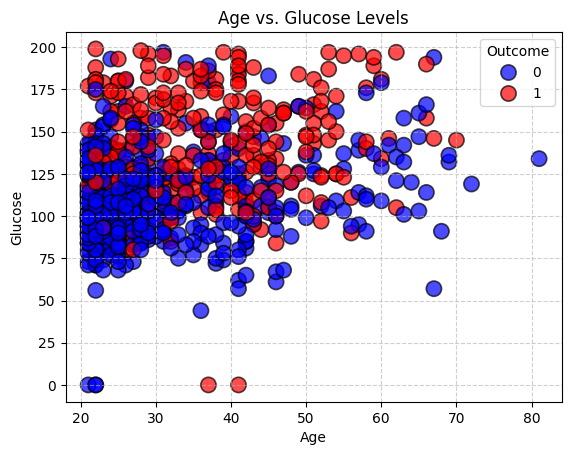

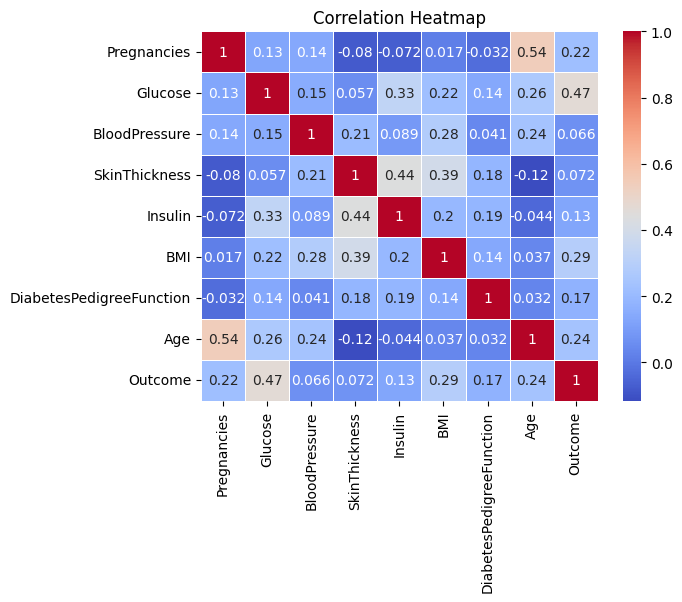

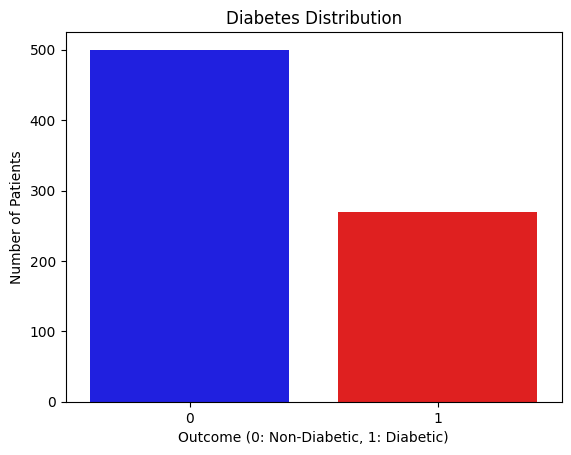

In [7]:


from corner import corner
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns


def plot_relational_plot(df):
    """Generates and saves a scatter plot showing relationships in the dataset."""
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='Age', y='Glucose', hue='Outcome', alpha=0.7, s=120,
                    palette=['blue', 'red'], edgecolor='black', linewidth=1.2)
    plt.title('Age vs. Glucose Levels')
    plt.xlabel('Age')
    plt.ylabel('Glucose')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('relational_plot.png')
    return


def plot_categorical_plot(df):
    """Generates and saves a categorical bar plot of the dataset."""
    fig, ax = plt.subplots()
    sns.countplot(data=df, x='Outcome', hue='Outcome', palette=['blue', 'red'], legend=False)
    plt.title('Diabetes Distribution')
    plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
    plt.ylabel('Number of Patients')
    plt.savefig('categorical_plot.png')
    return


def plot_statistical_plot(df):
    """Generates and saves a heatmap showing correlations between numerical variables."""
    fig, ax = plt.subplots()
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.savefig('statistical_plot.png')
    return


def statistical_analysis(df, col: str):
    """Computes and returns the mean, standard deviation, skewness, and excess kurtosis of a specified column."""
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col])
    excess_kurtosis = ss.kurtosis(df[col])
    return mean, stddev, skew, excess_kurtosis


def preprocessing(df):
    """Preprocesses the dataset by filling missing values with the median and performing basic statistical summaries.
    
    Uses quick features such as 'describe', 'head/tail', and 'corr' to get insights into the dataset.
    """
    df.fillna(df.median(), inplace=True)
    return df


def writing(moments, col):
    """Prints the statistical moments for a given column, including mean, standard deviation, skewness, and kurtosis."""
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:.2f}, '
          f'Skewness = {moments[2]:.2f}, and '
          f'Excess Kurtosis = {moments[3]:.2f}.')
    
    # Determine skewness category
    if moments[2] > 1:
        skew_type = "right-skewed"
    elif moments[2] < -1:
        skew_type = "left-skewed"
    else:
        skew_type = "approximately symmetric"
    
    # Determine kurtosis category
    if moments[3] > 1:
        kurtosis_type = "leptokurtic (high peak)"
    elif moments[3] < -1:
        kurtosis_type = "platykurtic (flat distribution)"
    else:
        kurtosis_type = "mesokurtic (normal distribution)"
    
    print(f'The data is {skew_type} and {kurtosis_type}.')
    return


def main():
    """Main function that loads the dataset, processes it, performs analysis, and generates visualizations."""
    df = pd.read_csv('diabetes.csv')
    df = preprocessing(df)
    col = 'Glucose'  # Example column for analysis
    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)
    moments = statistical_analysis(df, col)
    writing(moments, col)
    return


if __name__ == "__main__":
    main()
